<a href="https://colab.research.google.com/github/ranamaddy/ML/blob/main/Crop_Recommendation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [8]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots 
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS** 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report

In [9]:
import pandas as pd # Data Processing
import numpy as np
stroke_data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
print(stroke_data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


**to read data from dataset**

In [10]:
stroke_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**show data from tail**

In [11]:
stroke_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [12]:
type(stroke_data)

pandas.core.frame.DataFrame

# **Exploring Data**

In [13]:
stroke_data.sample(4)

,N,P,K,temperature,humidity,ph,rainfall,label
1888,8,28,30,25.516185,94.334654,6.015672,135.127249,coconut
1152,37,36,27,27.552974,47.908591,5.910635,90.403327,mango
875,0,69,21,25.869282,61.883211,7.072923,36.682840,lentil
980,10,5,42,20.241049,91.087068,6.887006,109.253773,pomegranate


# **checking data types**

In [14]:
stroke_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**information of dataset**

In [15]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [16]:
stroke_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
stroke_data.shape

(2200, 8)

In [18]:
stroke_data.ndim

2

In [19]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
stroke_data["label"].nunique()

22

In [21]:
stroke_data.label.nunique()

22

In [22]:
stroke_data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [23]:
stroke_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
stroke_data.head(4)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


In [25]:
stroke_data.label.value_counts(True)

rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: label, dtype: float64

In [26]:
stroke_data.label.value_counts().rename('count'),

stroke_data.label.value_counts(True).rename('%').mul(100)

rice           4.545455
maize          4.545455
jute           4.545455
cotton         4.545455
coconut        4.545455
papaya         4.545455
orange         4.545455
apple          4.545455
muskmelon      4.545455
watermelon     4.545455
grapes         4.545455
mango          4.545455
banana         4.545455
pomegranate    4.545455
lentil         4.545455
blackgram      4.545455
mungbean       4.545455
mothbeans      4.545455
pigeonpeas     4.545455
kidneybeans    4.545455
chickpea       4.545455
coffee         4.545455
Name: %, dtype: float64

In [27]:
stroke_data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**read 20 sampel data  from datset**

In [28]:
stroke_data["label"].sample(20)

1894        coconut
1722         papaya
648        mungbean
1873        coconut
1465      muskmelon
710       blackgram
1476      muskmelon
1627         orange
1001         banana
1005         banana
910     pomegranate
1408      muskmelon
1741         papaya
192           maize
198           maize
777       blackgram
1161          mango
2092           jute
1675         orange
1011         banana
Name: label, dtype: object

In [29]:
stroke_data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of cropes')

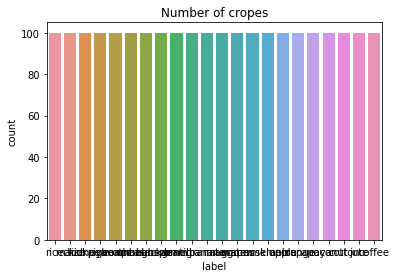

In [30]:
# Show Number of Patient by Stroke 
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=stroke_data , x='label')
plt.title('Number of cropes')

In [31]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [32]:
stroke_data.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
1321,97,8,52,24.910323,86.971900,6.237862,49.485757,watermelon
484,22,62,16,34.645541,54.323425,4.828936,180.901000,pigeonpeas
554,32,41,16,28.636189,61.394513,7.702287,68.548779,mothbeans
62,93,58,38,20.615214,83.773456,6.932400,279.545172,rice
532,8,45,15,28.095690,60.983538,4.611364,33.841108,mothbeans
1957,129,47,20,24.412123,80.803438,6.281914,98.604574,cotton
1161,23,24,32,28.121809,46.168886,5.630620,93.302474,mango
1882,31,13,33,29.699523,95.212244,6.342464,148.300369,coconut
1495,96,13,55,29.527531,94.574594,6.700338,21.135457,muskmelon
984,20,27,41,20.513435,92.516759,5.700089,110.576402,pomegranate


**features name**

In [33]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**Missing Values**

In [34]:
stroke_data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


***chek any null value ***

In [35]:
stroke_data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [36]:
stroke_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [37]:
print('Missing data sum :')
print(stroke_data.isnull().sum())

print('\nMissing data percentage (%):')
print(stroke_data.isnull().sum()/stroke_data.count()*100)

Missing data sum :
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Missing data percentage (%):
N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


**Seperate Categorical and Numerical Features**

In [38]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  1
********************************************************************************
Categorical variables column name: ['label']


In [39]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,label


In [40]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [41]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [42]:
numerical_features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [43]:
cat_features

['label']

**Checking Duplicating Values**

In [44]:
stroke_data.humidity.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: humidity, Length: 2200, dtype: bool

In [45]:
stroke_data.ph.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: ph, Length: 2200, dtype: bool

In [46]:
stroke_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [47]:
stroke_data.duplicated().sum()

0

In [48]:
stroke_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [49]:
stroke_data['ph'].unique()

array([6.50298529, 7.03809636, 7.84020714, ..., 6.36260785, 6.75879255,
       6.77983261])

In [50]:
stroke_data['ph'].sample(10)

1422    6.559763
1309    6.039585
71      7.300411
517     4.524172
1154    6.814630
1836    6.366220
1761    6.941497
635     6.991242
272     7.354973
893     7.327110
Name: ph, dtype: float64

In [51]:
stroke_data['N'].sample(10)

1991    131
1848     29
48       79
1261     22
376      27
2072     70
1035    116
1094     85
1290     38
471       5
Name: N, dtype: int64

In [52]:
stroke_data['temperature'].sample(10)

1163    28.894094
2016    23.314104
619     28.954512
2121    25.567483
394     18.313575
146     24.875028
1260    33.342145
104     18.478913
699     28.438097
1649    11.547857
Name: temperature, dtype: float64

In [53]:
stroke_data['N'].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134])

In [54]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

[Text(0.5, 1.0, 'Correlation Matrix')]

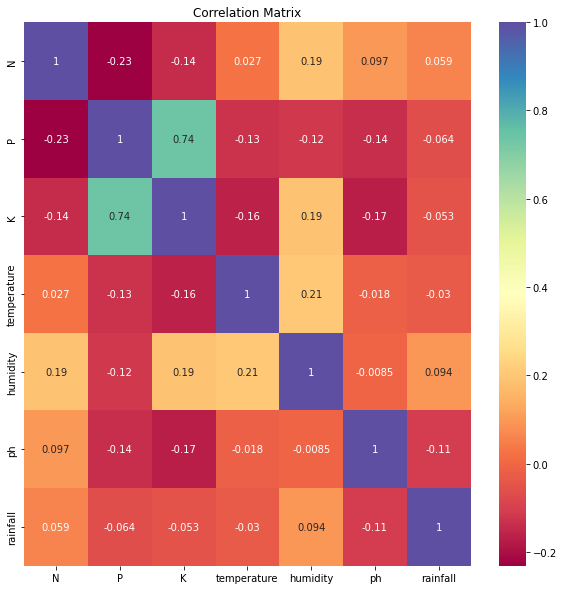

In [55]:
# Correlation matrix
corr = stroke_data.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<AxesSubplot:>

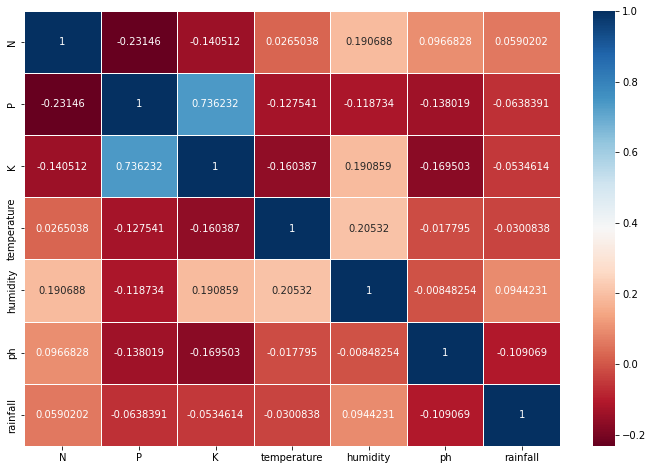

In [56]:
fig = plt.figure(figsize=(12,8))
corr = stroke_data.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [57]:
corr_matrix = stroke_data.corr().round(2)
corr_matrix  

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


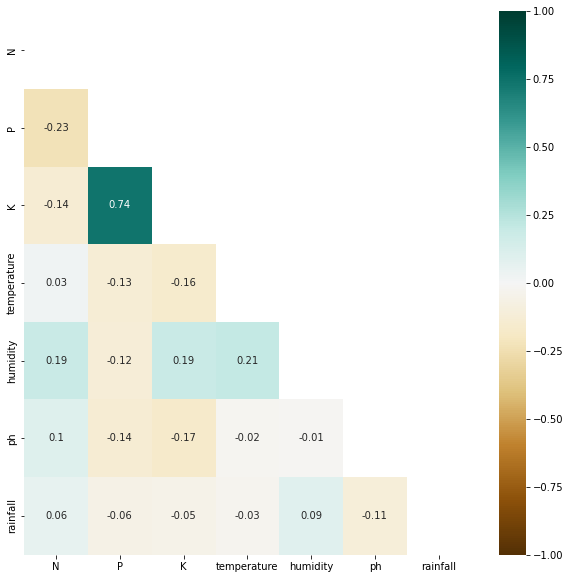

In [58]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [59]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


**Visualizing Categorical Features**

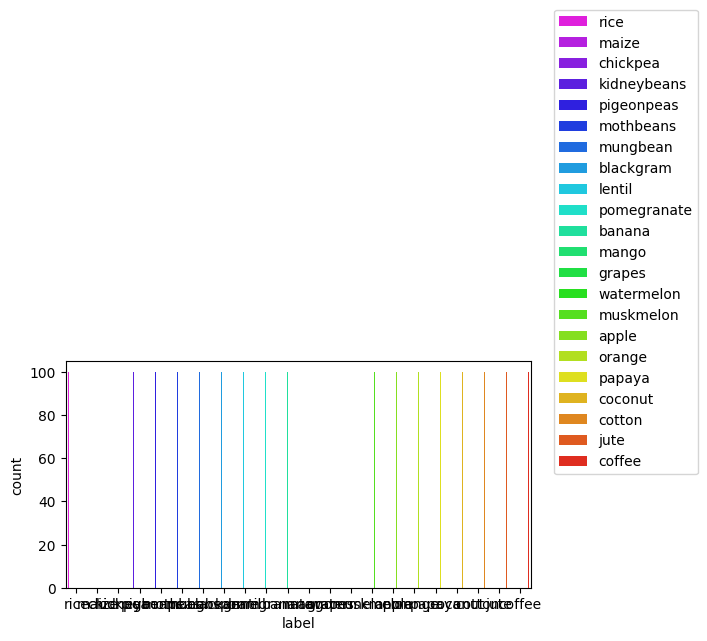

In [60]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=stroke_data,x=col,hue ='label',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

**Barplot of numerical features:**

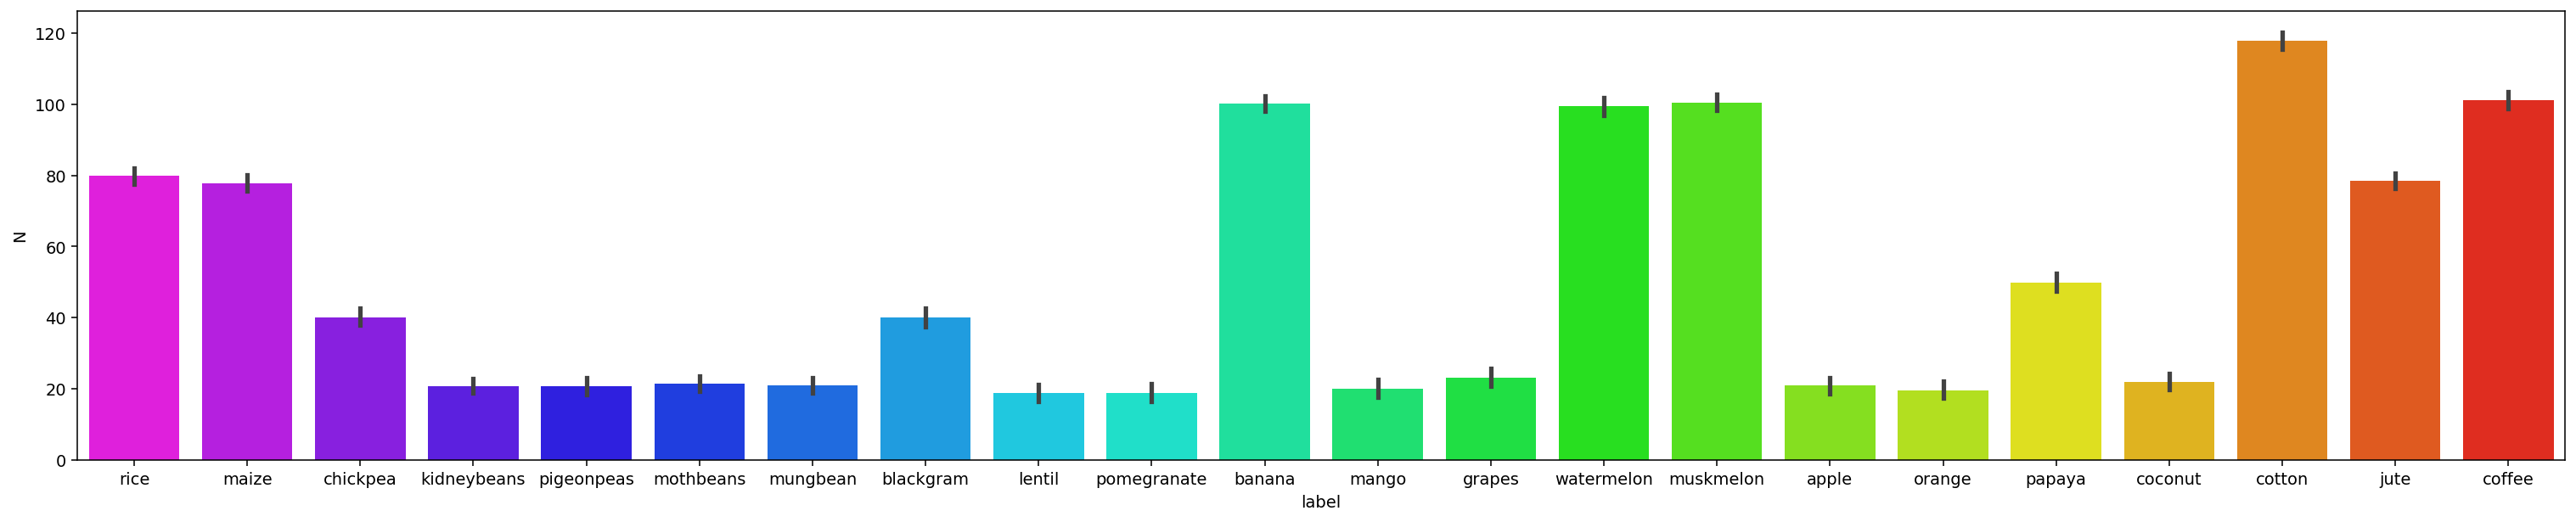

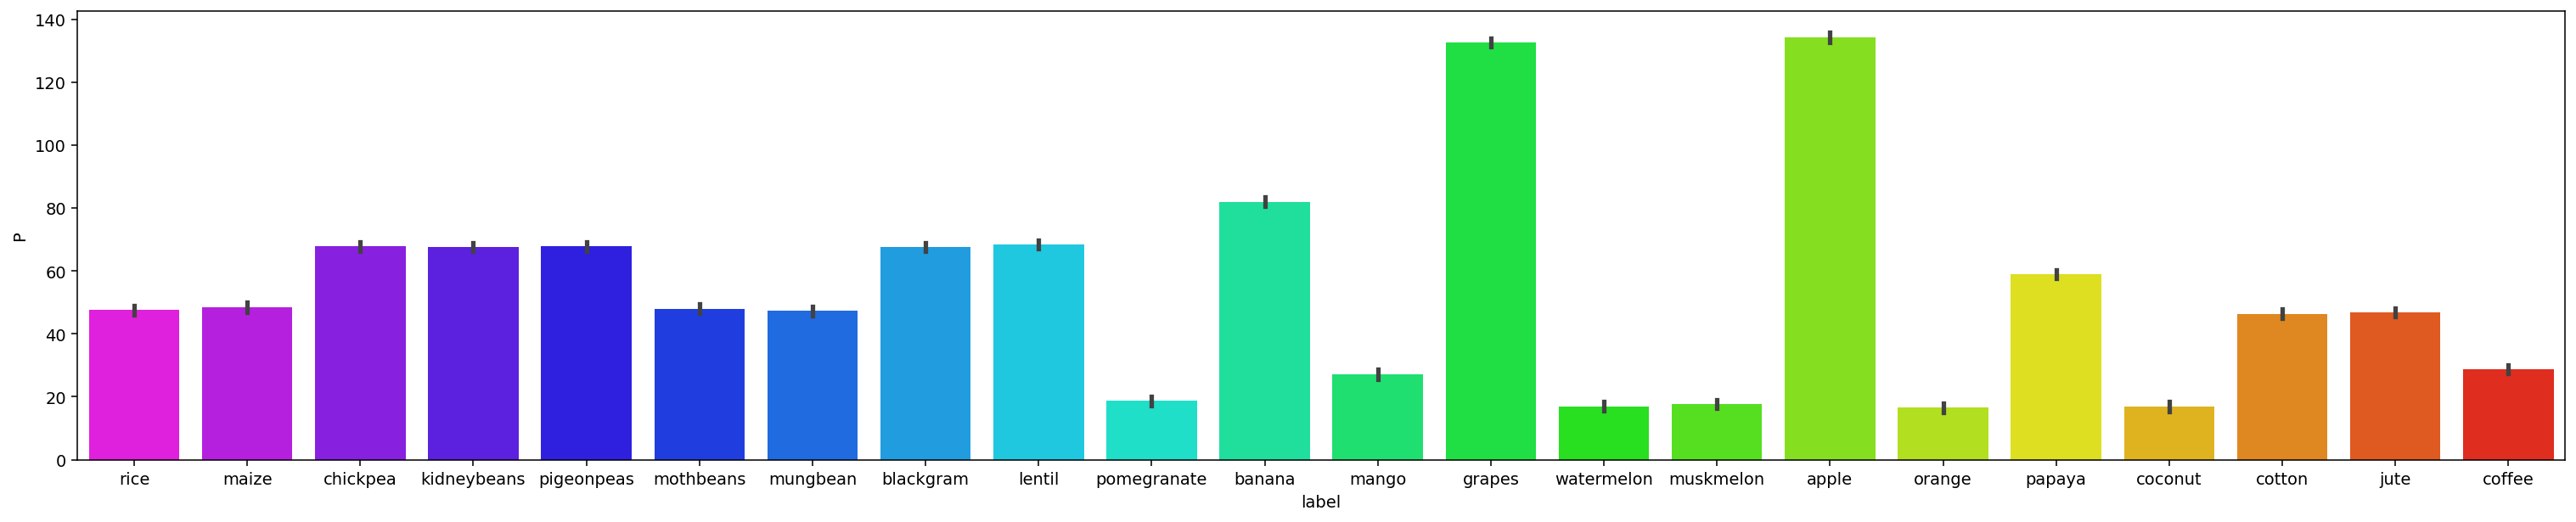

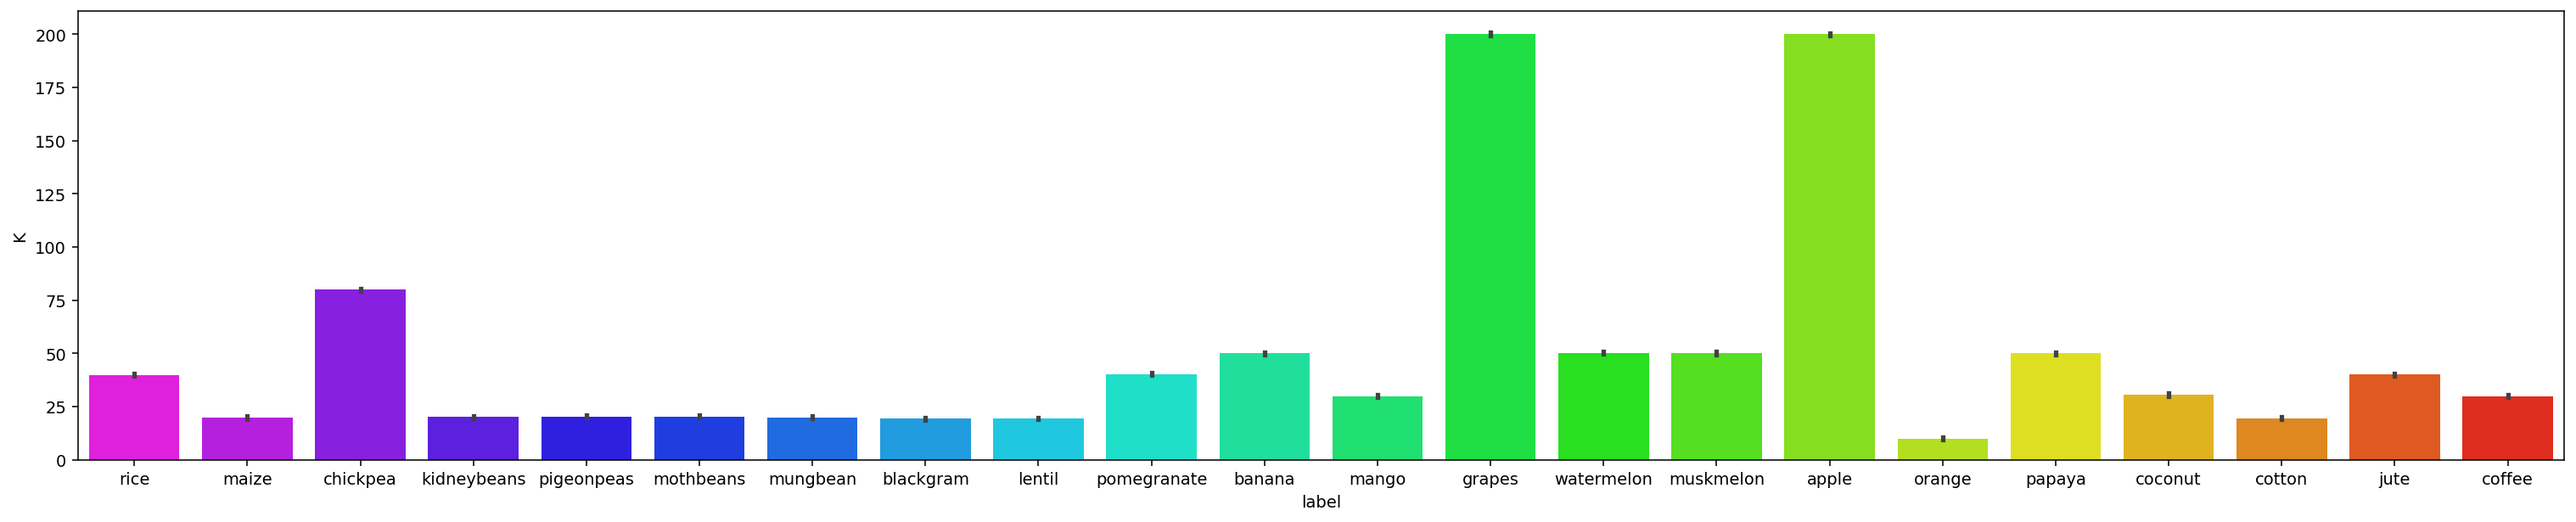

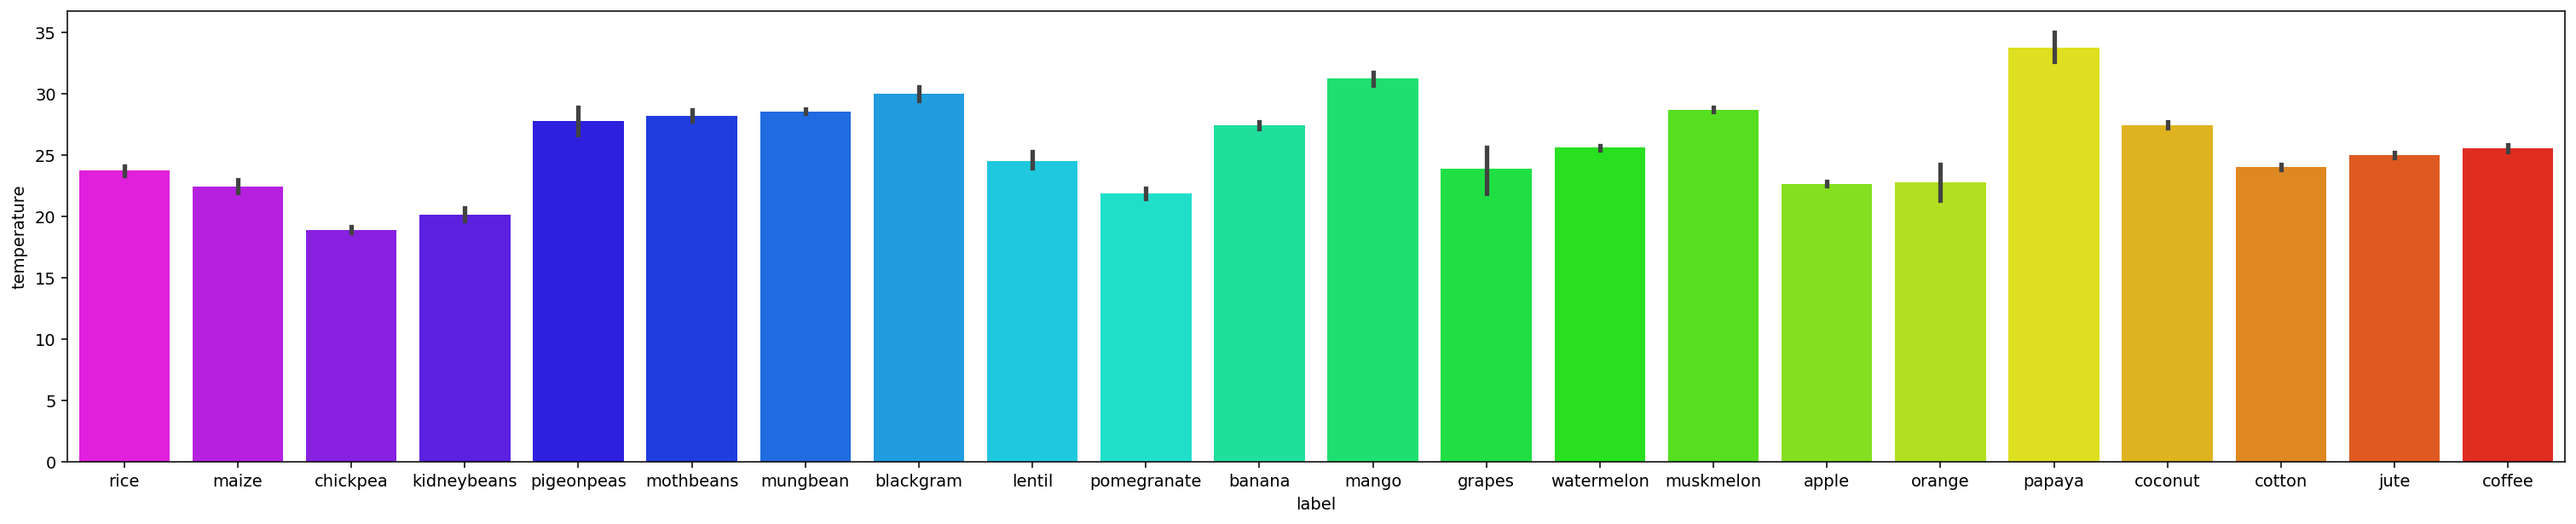

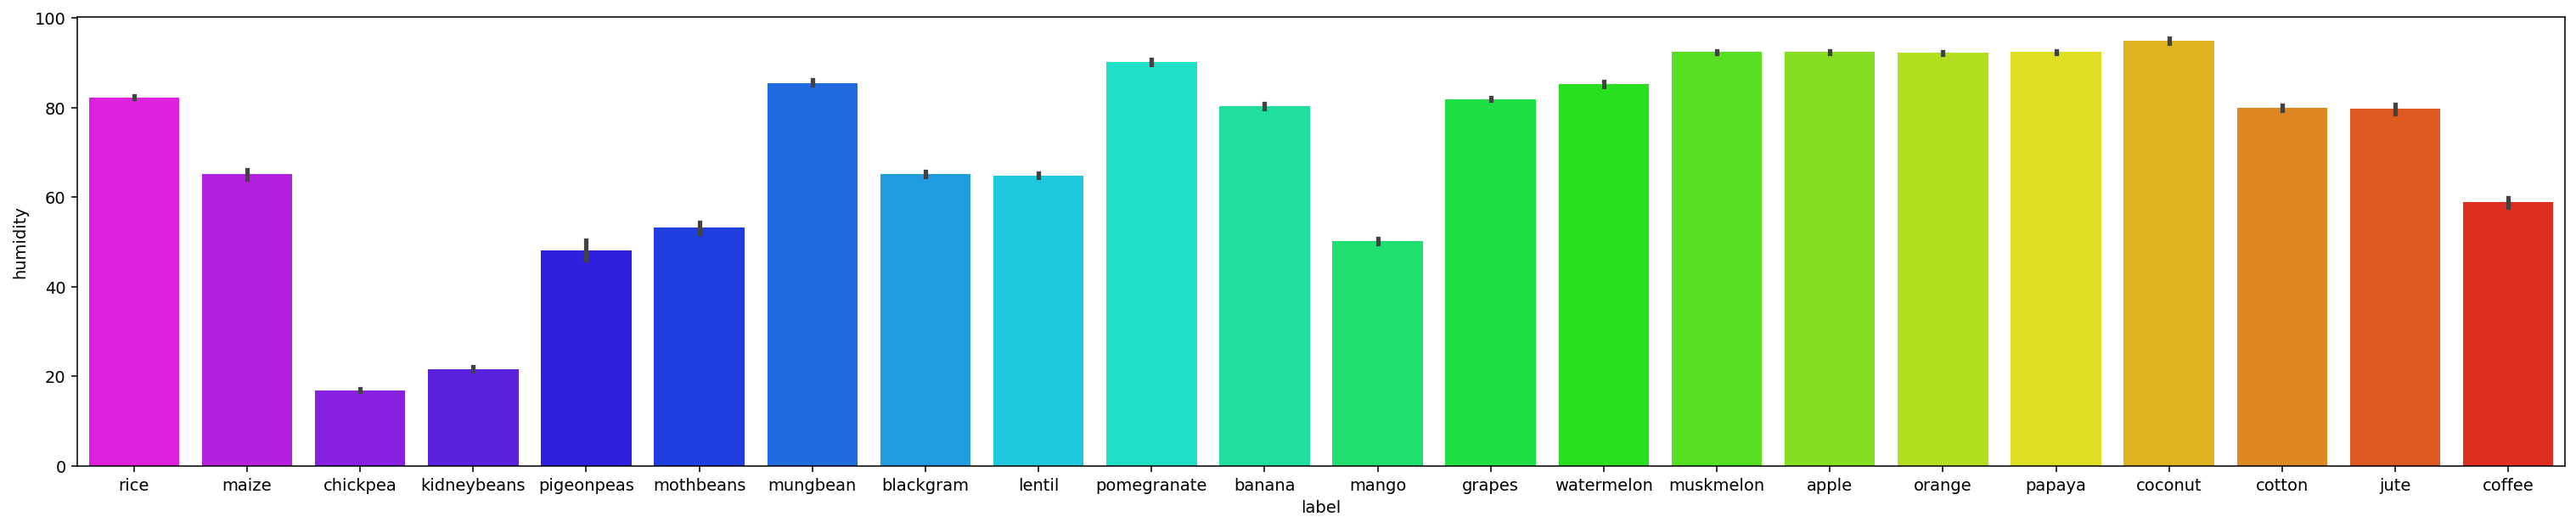

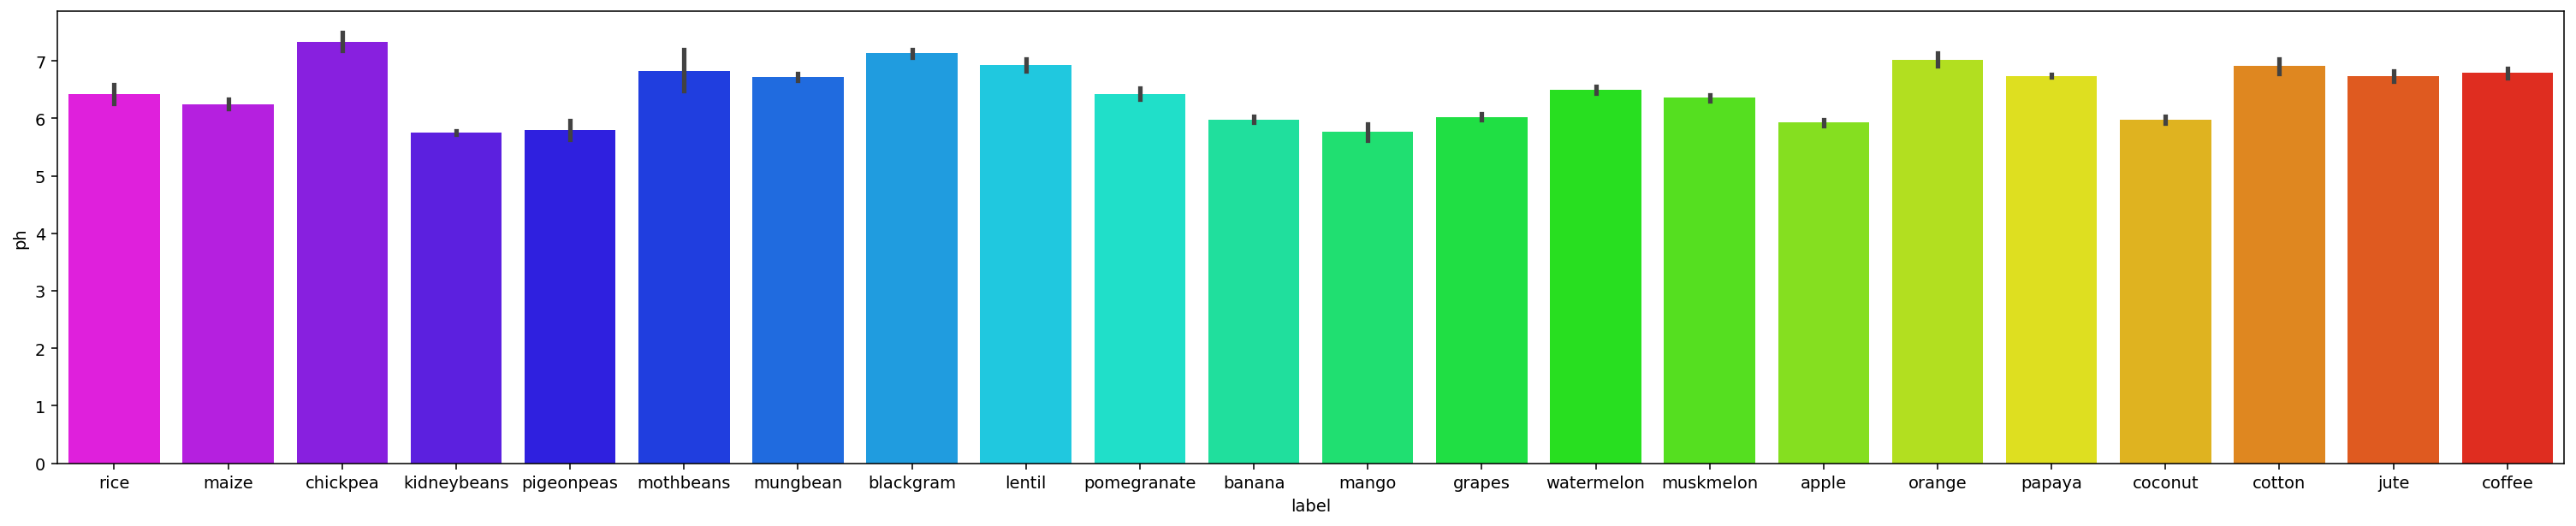

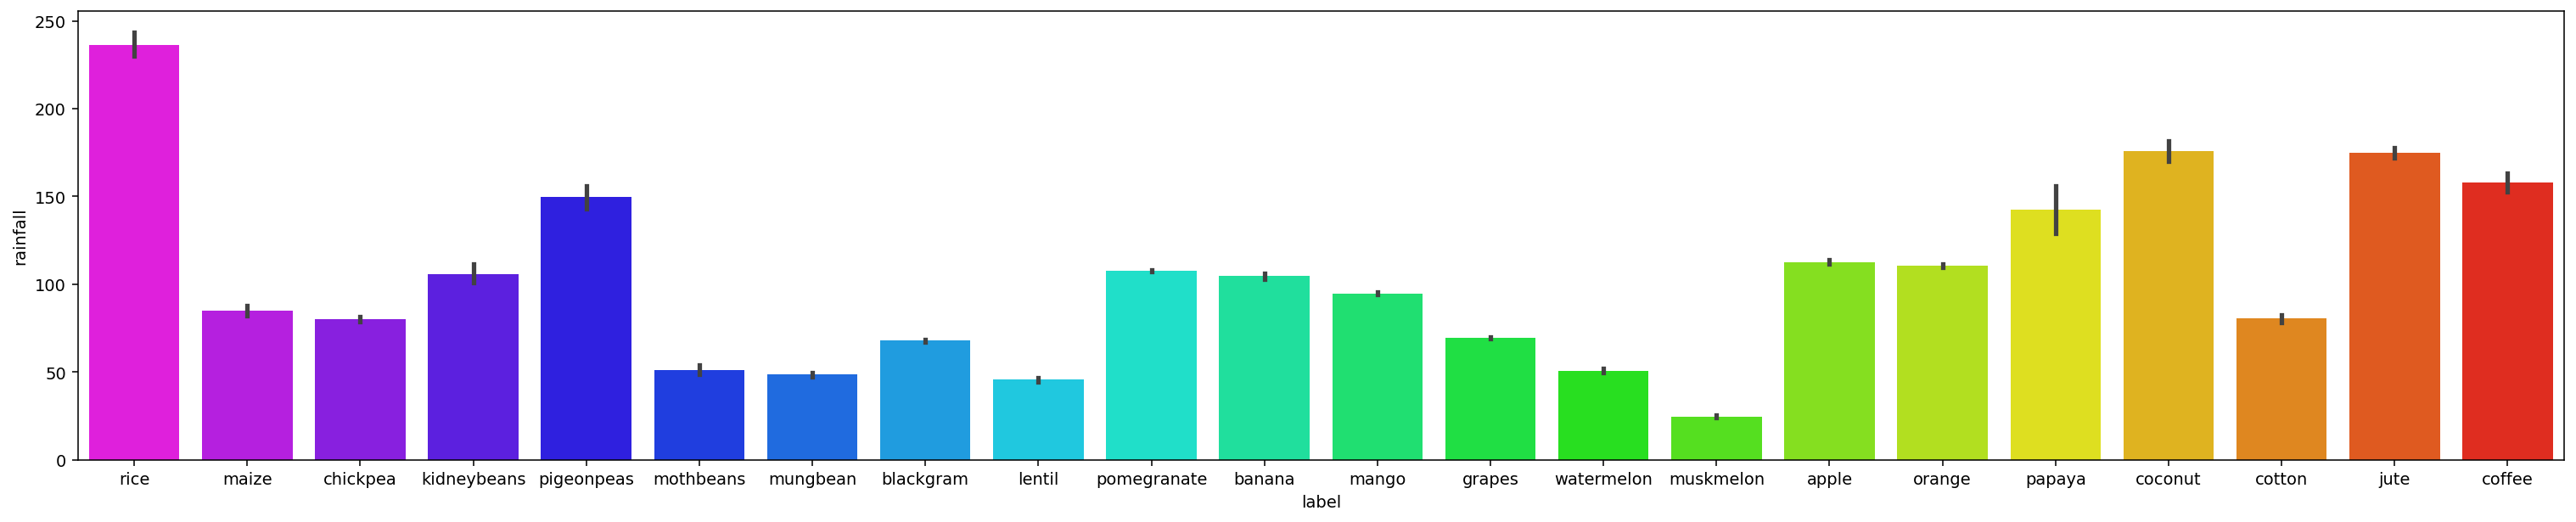

In [61]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(27,5), dpi=140)
    sns.barplot(data=stroke_data,x='label',y=col,palette='gist_rainbow_r')

In [62]:
stroke_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [63]:


train  = stroke_data
train

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [64]:
train.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [65]:
train.shape

(2200, 8)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [67]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [68]:
train_data_cat.head(10)

,label
0,rice
1,rice
2,rice
3,rice
4,rice
5,rice
6,rice
7,rice
8,rice
9,rice


In [69]:
train_data_num.head(3)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248


**Converting categorical features into numerical**

In [70]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_pomegranate,label_rice,label_watermelon,N,P,K,temperature,humidity,ph,rainfall
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,78,42,42,20.130175,81.604873,7.628473,262.717340


In [72]:
data

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_pomegranate,label_rice,label_watermelon,N,P,K,temperature,humidity,ph,rainfall
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,117,32,34,26.272418,52.127394,6.758793,127.175293


**seperate dependant and independant featur**

In [73]:
y = data['rainfall']
x = data.drop('rainfall', axis = 1)

In [74]:
print(x.shape)
print(y.shape)

(2200, 28)
(2200,)


**scailing the data**

In [75]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [76]:
x

array([[-0.21821789, -0.21821789, -0.21821789, ..., -0.93558693,
         0.47266646,  0.04330173],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.75964603,
         0.39705125,  0.73487256],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.51589814,
         0.48695381,  1.77151047],
       ...,
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.29321843,
        -0.19123516, -0.13812031],
       [-0.21821789, -0.21821789, -0.21821789, ...,  0.12961223,
        -0.86951801,  0.37390383],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.39766703,
        -0.49802006,  0.40109573]])

**Splitting data into Training and Testing**

In [77]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

**Splitting the dataset**
training data 70%
testing data 30%

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((1540, 28), (660, 28))

In [82]:
y_train

2002    196.624951
2194    166.254931
1165     91.011530
1490     20.765821
164      83.210306
           ...    
211      74.585651
1603    114.665951
537      66.176146
1220     72.242308
175      75.822705
Name: rainfall, Length: 1540, dtype: float64

**Building Classifiers**

In [79]:
accuracy = {}

**Logistic Regression**

In [81]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

ValueError: ignored